In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

#Scrapping data dari website

In [2]:
# import newspaper
# from newspaper import Article
# from newspaper import Source
# from newspaper import news_pool
# import pandas as pd

# # list website
# detik = newspaper.build('https://news.detik.com/', memoize_articles=False)
# kompas = newspaper.build("https://www.kompas.com/", memoize_articles=False)
# MD = newspaper.build('https://mediaindonesia.com/', memoize_articles=False)
# cnn = newspaper.build("https://www.cnnindonesia.com/", memoize_articles=False)

# # buat source di list
# # papers = [detik, kompas]
# papers = [MD, cnn]

# # to extract the bits of data we want.
# news_pool.set(papers, threads_per_source=4)

# news_pool.join()

# # buat dataframe final
# final_df = pd.DataFrame()

# for source in papers:
#     # temporary lists to store each element we want to extract
#     list_title = []
#     list_text = []
#     list_source =[]

#     count = 0

#     for article_extract in source.articles:
#         article_extract.parse()

#         # Appending the elements we want to extract
#         list_title.append(article_extract.title)
#         list_text.append(article_extract.text)
#         list_source.append(article_extract.source_url)

#         # Update count
#         count +=1

#     # temp_df = pd.DataFrame({'Title': list_title, 'Text': list_text, 'Source': list_source})
#     temp_df = pd.DataFrame({'Title': list_title, 'Text': list_text})
#     # Append to the final DataFrame
#     final_df = final_df.append(temp_df, ignore_index = True)
    
# # From here you can export this to csv file
# final_df.to_csv('MDCNN.csv')

#Detik & Kompas

In [3]:
#untuk upload file csv
from google.colab import files
uploaded = files.upload()

Saving DetikKompas.csv to DetikKompas.csv


In [4]:
import io
dfDetikKompas = pd.read_csv(io.BytesIO(uploaded['DetikKompas.csv']))

In [5]:
dfDetikKompas.head()

,Unnamed: 0,Title,Text
0,0,Keluarga Awak KRI Nanggala Menanti Berita,Jakarta - KRI Nanggala 402 hilang kontak saat ...
1,1,Momen Penyidik KPK Stepanus Digiring dan Diborgol,Jakarta - Penyidik KPK Stepanus Robin Pattuju ...
2,2,MINI Countryman Made in Indonesia Mejeng di II...,"Dengan konsep eksterior yang tegas, interior y..."
3,3,Patung Garuda Wisnu Kencana Versi Mini Ini Dij...,Sukoharjo - Perajin membuat Patung Wahyu Kenca...
4,4,10 Momen Manis Pria Asal Jember yang Viral Men...,"Australia - Kisah asmara pria dari Jember, Jaw..."


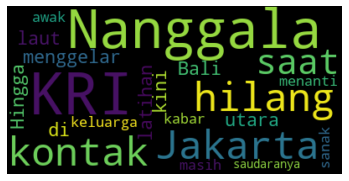

In [6]:
# Start with one review:
text = dfDetikKompas.Text[0]
title = dfDetikKompas.Title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

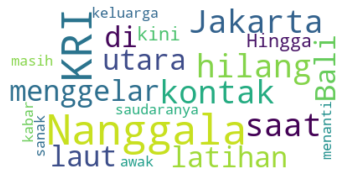

In [7]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

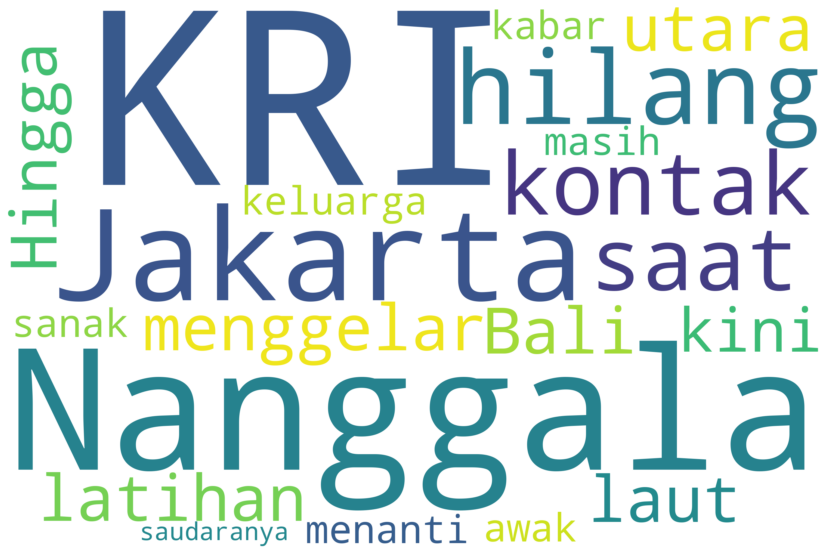

In [8]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["dan", "atau", "di", "yang"])

# Generate a word cloud image
wordcloud = WordCloud(max_words=500, stopwords=stopwords, background_color="white", width = 3000, height = 2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Jadi kesimpulan yang bisa diambil ketika melakukan scraping pada situs detik dan kompas pada tanggal 23 April 2021, kata yang sering muncul adalah Nanggala. Jadi pada kedua situs tersebut berita tentang KRI Nanggala yang sering mumcul.**

In [9]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
cd drive/

/content/drive


In [11]:
!ls

MyDrive  Shareddrives


In [12]:
# cd /content/

In [13]:
%cd MyDrive/Colab\ Notebooks
# cd gdrive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [14]:
%cd tugas\ wordcloud

/content/drive/MyDrive/Colab Notebooks/tugas wordcloud


In [15]:
!ls

 cnnlogo.png	       'MDCNN (1).csv'	 wcdk.png
'DetikKompas (1).csv'  'MDCNN (2).csv'	 wine1.png
 DetikKompas.csv       'MDCNN (3).csv'	 wine.png
 detiklogo.png	        MDCNN.csv	 wordcloud_1301170106.ipynb
 kompaslogo.jpeg        MDlogo.png	 Wordcloud.ipynb
 Kompas.svg	        us_wine.png


In [16]:
PATH_OF_DATA= '/content/drive/"My Drive"/Colab\ Notebooks/tugas\ wordcloud/'
!ls {PATH_OF_DATA}

 cnnlogo.png	       'MDCNN (1).csv'	 wcdk.png
'DetikKompas (1).csv'  'MDCNN (2).csv'	 wine1.png
 DetikKompas.csv       'MDCNN (3).csv'	 wine.png
 detiklogo.png	        MDCNN.csv	 wordcloud_1301170106.ipynb
 kompaslogo.jpeg        MDlogo.png	 Wordcloud.ipynb
 Kompas.svg	        us_wine.png


In [17]:
import numpy as np
from PIL import Image

DK = np.array(Image.open('wine.png'))
DK

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [19]:
# Transform your mask into a new one that will work with the function:
transformed_DK = np.ndarray((DK.shape[0],DK.shape[1]), np.int32)

for i in range(len(DK)):
    transformed_DK[i] = list(map(transform_format, DK[i]))

In [20]:
# Check the expected result of your mask
transformed_DK

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

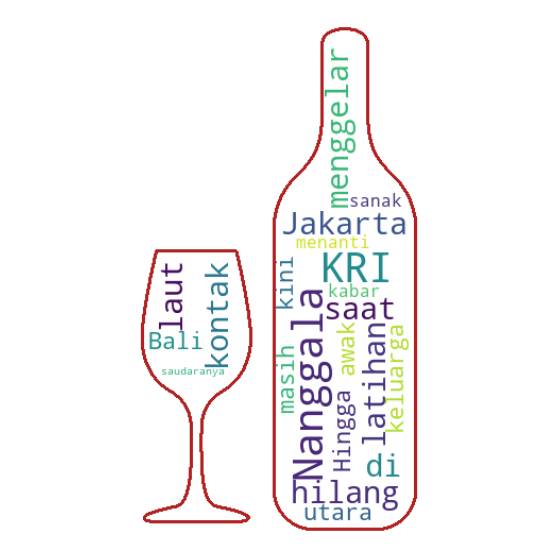

In [21]:
# Create a word cloud image
WWCC = WordCloud(background_color="white", max_words=1000, mask=transformed_DK,contour_width=3, contour_color='firebrick')

# Generate a wordcloud
WWCC.generate(text)

# store to file
WWCC.to_file("wine1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(WWCC, interpolation='bilinear')
plt.axis("off")
plt.show()

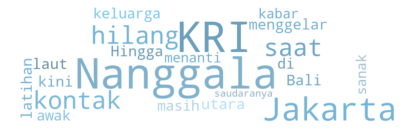

In [22]:
#untuk logo detik
# Generate a word cloud image
mask = np.asarray(Image.open(path.join("MDlogo.png"))) 
wordcloudDK = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask, width = 3000, height = 2000).generate(text)

# create coloring from image

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloudDK.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("dk.png", format="png")

plt.show()

In [23]:
!ls

 cnnlogo.png	        Kompas.svg	 us_wine.png
'DetikKompas (1).csv'  'MDCNN (1).csv'	 wcdk.png
 DetikKompas.csv       'MDCNN (2).csv'	 wine1.png
 detiklogo.png	       'MDCNN (3).csv'	 wine.png
 dk.png		        MDCNN.csv	 wordcloud_1301170106.ipynb
 kompaslogo.jpeg        MDlogo.png	 Wordcloud.ipynb


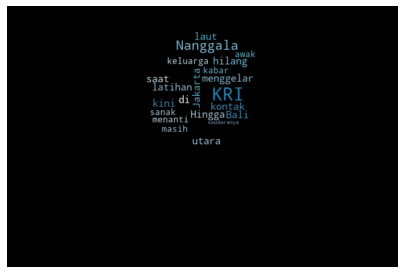

In [24]:
# untuk logo kompas
# Generate a word cloud image
mask = np.asarray(Image.open(path.join("kompaslogo.jpeg"))) 
wordcloudDK = WordCloud(background_color="black", mode="RGBA", max_words=1000, mask=mask, width = 3000, height = 2000).generate(text)

# create coloring from image

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloudDK.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("dk.png", format="png")

plt.show()

#Media Indonesia & CNN

In [25]:
from google.colab import files
uploaded = files.upload()

Saving MDCNN.csv to MDCNN (4).csv


In [26]:
import io
dfMDCNN = pd.read_csv(io.BytesIO(uploaded['MDCNN.csv']))

In [27]:
dfMDCNN.head()

,Unnamed: 0,Title,Text
0,0,"Pasien Bertambah, Hari Ini RSD Wisma Atlet Mer...","SETELAH sempat menurun ke angka terendah, kini..."
1,1,Di Sleman Muncul Klaster Covid Jongke,"SEBANYAK 35 warga Padukuhan Jongke Kidul, Kalu..."
2,2,Penyelenggara Olimpiade Laporkan Kasus Covid-1...,PENYELENGGARA Olimpiade Tokyo melaporkan kasus...
3,3,Rumah Dinas Komandan KRI Nanggala-402 Ramai Di...,RUMAH dinas Komandan Kapal Selam KRI Nanggala-...
4,4,KLHK Sita Puluhan Satwa Dilindungi di Bali,TIM Operasi Gabungan Balai Gakkum Kementerian ...


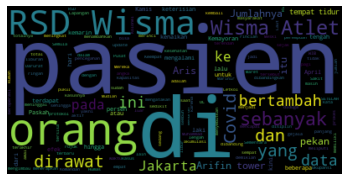

In [28]:
# Start with one review:
text = dfMDCNN.Text[0]
title = dfMDCNN.Title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

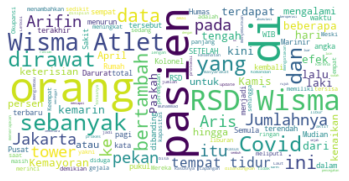

In [29]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

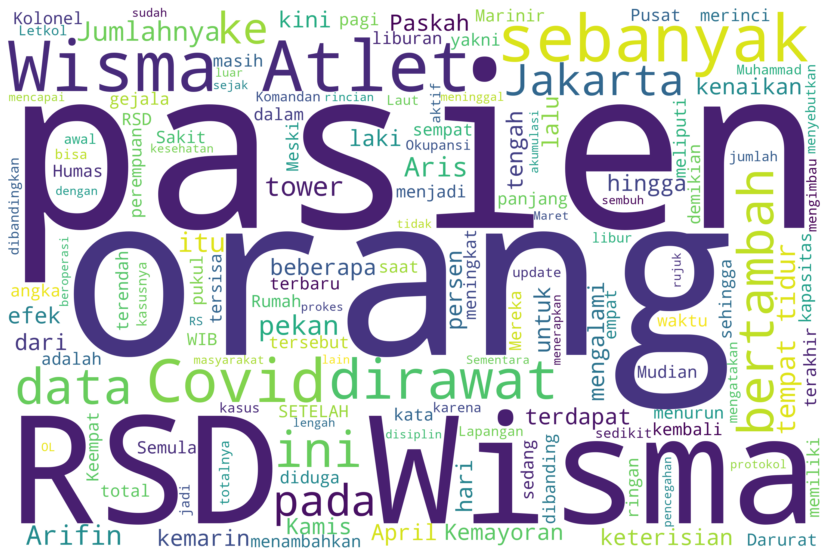

In [30]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["dan", "atau", "di", "yang"])

# Generate a word cloud image
wordcloud = WordCloud(max_words=500, stopwords=stopwords, background_color="white", width = 3000, height = 2000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
plt.savefig("wcdk.png", format="png")

files.download('wcdk.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

**Jadi kesimpulan yang bisa diambil ketika melakukan scraping pada situs media indonesia dan cnn pada tanggal 23 April 2021, kata yang sering muncul adalah pasien. Jadi pada kedua situs tersebut berita yang berhubungan dengan pasien, covid, RSD wisma adalah yang sering mumcul.**

In [32]:
PATH_OF_DATA= '/content/drive/"My Drive"/Colab\ Notebooks/tugas\ wordcloud/'
!ls {PATH_OF_DATA}

 cnnlogo.png	       'MDCNN (1).csv'	 wcdk.png
'DetikKompas (1).csv'  'MDCNN (2).csv'	 wine1.png
 DetikKompas.csv       'MDCNN (3).csv'	 wine.png
 detiklogo.png	       'MDCNN (4).csv'	 wordcloud_1301170106.ipynb
 dk.png		        MDCNN.csv	 Wordcloud.ipynb
 kompaslogo.jpeg        MDlogo.png
 Kompas.svg	        us_wine.png


In [33]:
import numpy as np
from PIL import Image

DK1 = np.array(Image.open('wine.png'))
DK1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
def transform_format1(val):
    if val == 0:
        return 255
    else:
        return val

In [35]:
# Transform your mask into a new one that will work with the function:
transformed_DK1 = np.ndarray((DK.shape[0],DK1.shape[1]), np.int32)

for i in range(len(DK1)):
    transformed_DK1[i] = list(map(transform_format1, DK[i]))

In [36]:
# Check the expected result of your mask
transformed_DK1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

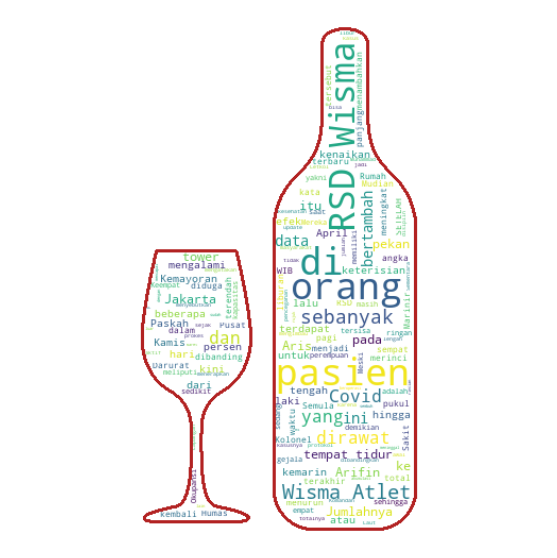

In [37]:
# Create a word cloud image
WWCC1 = WordCloud(background_color="white", max_words=1000, mask=transformed_DK,contour_width=3, contour_color='firebrick')

# Generate a wordcloud
WWCC1.generate(text)

# store to file
WWCC1.to_file("wine1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(WWCC1, interpolation='bilinear')
plt.axis("off")
plt.show()

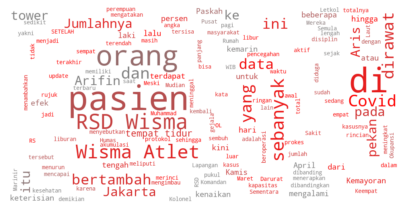

In [38]:
#untuk logo cnn
# Generate a word cloud image
mask = np.asarray(Image.open(path.join("cnnlogo.png"))) 
wordcloudCNNMD = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask, width = 3000, height = 2000).generate(text)

# create coloring from image

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloudCNNMD.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("cnnmd.png", format="png")

plt.show()

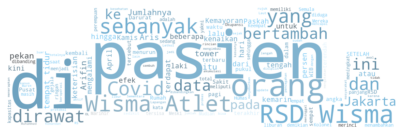

In [39]:
#untuk logo MD
# Generate a word cloud image
mask = np.asarray(Image.open(path.join("MDlogo.png"))) 
wordcloudCNNMD = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask, width = 3000, height = 2000).generate(text)

# create coloring from image

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloudCNNMD.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("cnnmd.png", format="png")

plt.show()